# Descripción general


En este proyecto se tiene la intención de realizar una prueba A/B que tiene la finalidad de probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado para una página de compra de productos.

Esta prueba fue desarrollada por un grupo de personas que realizó la recolección de datos y las pruebas entre los grupos de control y el grupo con los cambios aplicados.

El objetivo primordial es analizar los resultados de la prueba A/B y ver si en el grupo puesto a prueba con los cambios aplicados aumentó un 10% de eventos en cada etapa del embudo `product_page` → `product_cart` → `purchase`.


# Paso 1. Importar librerías y cargar los datasets en variables dataframe

En este paso solo se tiene la intención de cargar las librerías de pyhton que facilitarán el analisis de los datos contenidos en los datasets generados para las pruebas A/B y asignar los dos datsets a variables del tipo `dataframe` para su disposición posterior.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# asignación de dataframes a cada dataset del proyecto
ab_project_marketing_events_us = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
final_ab_new_users_upd_us = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
final_ab_events_upd_us = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
final_ab_participants_upd_us = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

# Paso 2. Análisis y depuración de los datos

En este paso se tiene la intención de analizar los datos contenidos en los dataframes con el objetivo de buscar anormalidades en los datos que generen ruido y afecten negativamente al análisis de los mismos.

Lo que se pretende buscar son tres cosas primordiales:

-	Valores ausentes

-	Registros duplicados

-	Incongruencias en los tipos de datos contenidos en las columnas

En el caso de presentarse alguno de los tres puntos anteriores, se tratarán los datos conforme al objetivo requerido para solo contar con los registros que sean de relevancia para el análisis de la pruebas A/B.

Para el análisis de cada dataframe se generó una función en donde se introduce el dataframe a analizar y arroja como resultado:

- Una información general de las columnas contenidas en el dataframe.
- Un conteo de valores ausentes de todas las columnas (si es que existen).
- Un conteo de registros duplicados (si es que existen).
- El total de registros contenidos en el dataframe.
- Una descripción final de las columnas numéricas del dataframe.

In [ ]:
def dataframe_analysis(df):
    # visualización incial del dataframe 
    df.info()
    print('-'*90)

    # conteo de valores ausentes en columnas
    print('Conteo de valores ausentes en las columnas:')
    for col in df.columns:
      print(f'{col}: {len(df[df[col].isna()])}')
    print('-'*90)

    # conteo de registros duplicados
    print(f'Número de registros duplicados: {df.duplicated().sum()}')
    print('-'*90)

    # total de registros
    print(f'Total de registros: {len(df)}')
    print('-'*90)

    # descripción de las columnas numéricas
    print(df.describe())

## ab_project_marketing_events_us

El primer dataframe que se analizará es `ab_project_marketing_events_us`, se utilizó la función `dataframe_analysis` para obtener una descipción de los datos para poder generar un plan de atención para las anormalidades que se presenten.

In [ ]:
dataframe_analysis(ab_project_marketing_events_us)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
------------------------------------------------------------------------------------------
Conteo de valores ausentes en las columnas:
name: 0
regions: 0
start_dt: 0
finish_dt: 0
------------------------------------------------------------------------------------------
Número de registros duplicados: 0
------------------------------------------------------------------------------------------
Total de registros: 14
------------------------------------------------------------------------------------------
                                    name regions    start_dt   finish_dt
count                                

Como se aprecia en el bloque de código anterior:

- No se contabilizan valores ausentes en las columnas.
- No se tienen registros duplicados en el dataframe.

El único aspecto a modificar es el tipo de dato almacenado en las columnas `start_dt` y `finish_dt` el cual se tienen datos del tipo `object`.

Teniendo en cuenta que el nombre de este par de columnas hacen referencia a fechas, es necesario cambiar el tipo de dato al tipo `datetime64[NS]`, esto con el fin de poder manipular los datos de fechas apropiadamente con los métodos que son destinados para este tipo de dato.

### Modificación del tipo de dato de las columnas `start_dt` y `finish_dt` 

In [ ]:
# lista con columnas a modificar
columns_dt1 = ['start_dt','finish_dt']

for col in columns_dt1:
    ab_project_marketing_events_us[col] = pd.to_datetime(ab_project_marketing_events_us[col])

print(ab_project_marketing_events_us.head())
print('-'*90)

ab_project_marketing_events_us.info()

                           name                   regions   start_dt  \
0      Christmas&New Year Promo             EU, N.America 2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America 2020-02-14   
2        St. Patric's Day Promo             EU, N.America 2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America 2020-04-12   
4             4th of July Promo                 N.America 2020-07-04   

   finish_dt  
0 2021-01-03  
1 2020-02-16  
2 2020-03-19  
3 2020-04-19  
4 2020-07-11  
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dt

Con el cambio del tipo de dato realizado en las columnas referentes al inicio de la campaña y al final de la misma, no se encuentran más aspectos a mejorar.

Con esto concluye el análisis y depuración de los datos del primer dataframe (`ab_project_marketing_events_us`)

## final_ab_new_users_upd_us

Se analizará el segundo dataframe (`final_ab_new_users_upd_us`) del mismo modo que el primero, utilizando la función `dataframe_analysis`.


In [ ]:
dataframe_analysis(final_ab_new_users_upd_us)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
------------------------------------------------------------------------------------------
Conteo de valores ausentes en las columnas:
user_id: 0
first_date: 0
region: 0
device: 0
------------------------------------------------------------------------------------------
Número de registros duplicados: 0
------------------------------------------------------------------------------------------
Total de registros: 58703
------------------------------------------------------------------------------------------
                 user_id  first_date region   device
count              58703       58703  58703   

En el análisis del dataframe `final_ab_new_users_upd_us` se tiene:

- No se contabilizan valores ausentes.
- No hay registros duplicados.

También se presenta el mismo caso que el anterior dataframe, se observa una inconsistencia en el tipo de dato almacenado en la columna `first_date`, dado a que la columna almacena la fecha de inscirpción de los nuevos usuarios, se cambiará el tipo de dato de la columna al tipo `datetime64[NS]`, con el fin de manejar las fechas de mejor manera para el análisis posterior.

### Modificación del tipo de dato de la columna `first_date`

In [ ]:
final_ab_new_users_upd_us['first_date'] = pd.to_datetime(final_ab_new_users_upd_us['first_date'])

print(final_ab_new_users_upd_us.head())
print('-'*90)

final_ab_new_users_upd_us.info()

            user_id first_date     region   device
0  D72A72121175D8BE 2020-12-07         EU       PC
1  F1C668619DFE6E65 2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F 2020-12-07         EU       PC
3  50734A22C0C63768 2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679 2020-12-07  N.America   iPhone
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


Con esta modificación realizada, se concluye el análisis y depuración de los datos del dataframe `final_ab_new_users_upd_us`.

## final_ab_events_upd_us

Del mismo modo que los dataframes anteriores, se utilizará la función `dataframe_analysis` para analizar el dataframe `final_ab_events_upd_us`.

In [ ]:
dataframe_analysis(final_ab_events_upd_us)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
------------------------------------------------------------------------------------------
Conteo de valores ausentes en las columnas:
user_id: 0
event_dt: 0
event_name: 0
details: 363447
------------------------------------------------------------------------------------------
Número de registros duplicados: 0
------------------------------------------------------------------------------------------
Total de registros: 423761
------------------------------------------------------------------------------------------
            details
count  60314.000000
mean      23.881219
std

En el análsis del dataframe `final_ab_events_upd_us` se tiene:

- 363447 valores ausentes en la columna `details`
- No hay registros duplicados

Dado a que los valores ausentes de la columna `details` corresponden al 85.76% del total de registros, se realizará un analisis a produndidad para conocer la naturaleza de esta ausencia.

En cuanto al tipo de dato almacenado en la columna `event_dt` se tiene un tipo de dato `object`, y dado a que esta columna esta destinada a almacenar la fecha y hora de los eventos, se cambiará el tipo de dato al tipo `datetime64[NS]`

### Valores ausentes - `details`

Como se observó en el análisis del dataframe, se tiene un total de 363447 valores ausentes en la columna `details`, esta columna guarda información adicional sobre los eventos de los que se tienen registro, un ejemplo de esta información es la cantidad total del pedido en USD para los eventos `purchase`.

Para tener una mejor idea de que valores podemos esperar en esta columna, se analizarán cuales y cuantos son los eventos que se registraron en este dataframe.

In [ ]:
# eventos únicos de la columna `event_name`
print(final_ab_events_upd_us['event_name'].unique())

['purchase' 'product_cart' 'product_page' 'login']


Se tiene un total de cuatro eventos registrados en el dataframe final_ab_events_upd_us, donde siguiendo una lógica secuencial de un embudo, el orden en que suceden los eventos es:

login → product_page → product_cart → purchase

Teniendo esta secuencia, se realizará un conteo de los registros que prtenecen a cada evento con la finalidad de descubir en cual de estos eventos hay mayores cantidades de valores ausentes.

In [ ]:
# conteo de valores ausentes por evento
print(final_ab_events_upd_us.groupby('event_name')['details'].count())

event_name
login               0
product_cart        0
product_page        0
purchase        60314
Name: details, dtype: int64


En el anterior bloque de código se visualiza que la cantidad de 60314 registros pertenecen a solo el evento `purchase` y los otros tres eventos no tienen registros.

Se asume que el único evento que tiene información detallada asociada es `purchase` para mostrar la cantidad total del pedido en USD, mientras que los otos tres eventos no requieren de información adicional asociada.

Antes de decidir que hacer con los valores ausentes, se realizará un gráfico para mostrar la distribución de los valores para la columna `details` que corresponden al evento `purchase` para ver entre que rangos se comprenden los datos adicionales para este evento.

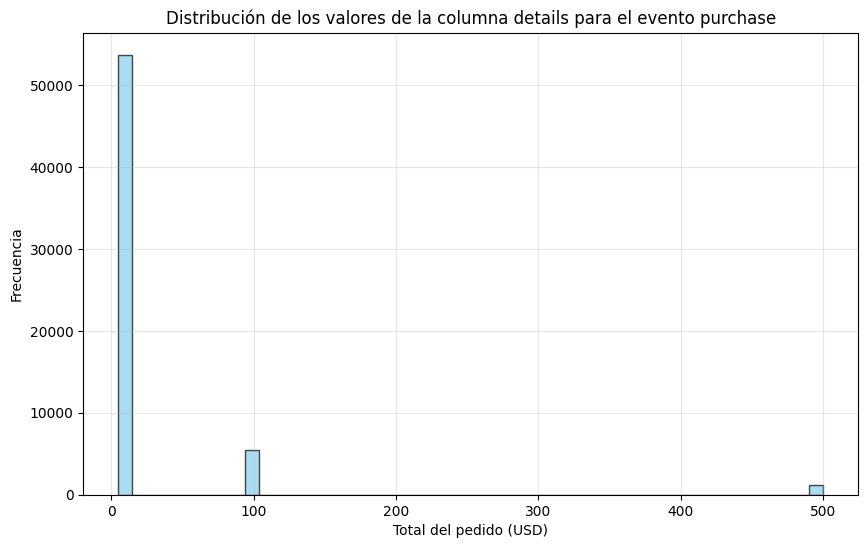

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(final_ab_events_upd_us[final_ab_events_upd_us['event_name'] == 'purchase']['details'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de los valores de la columna details para el evento purchase')
plt.xlabel('Total del pedido (USD)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

En el bloque de código anterior se presenta un histograma que muestra la distribución de los valores almacenados en la columna `details` para el evento `purchase` teniendo que solo se visualizan tres contenedores.

Para entender la cantidad de registros que pertenecen estos contenedores, se escribirá código para encontrar:

- Cantidad de valores únicos para esta columna y evento
- Cuales son los valores únicos que se encuentran dentro de esta columna y evento
- La cantidad de registros pertenecientes a cada valor único de esta columna y evento

In [ ]:
print()
print(f"Cantidad de valores únicos en la columna `details` para el evento `purchase`: {len(final_ab_events_upd_us[final_ab_events_upd_us['event_name'] == 'purchase']['details'].unique())}")
print('-'*90)
print(f"Valores unicos en la columna `details` para el evento `purchase`: {final_ab_events_upd_us[final_ab_events_upd_us['event_name'] == 'purchase']['details'].unique()}")
print('-'*90)
print("Conteo de registros para cada valor único de la columna `details` para el evento `purchase`:")
print(final_ab_events_upd_us[final_ab_events_upd_us['event_name'] == 'purchase']['details'].value_counts())
print('-'*90)
print(f"Porcentaje de registros pertenecientes de estos valores para el evento `purchase`:")
print((((final_ab_events_upd_us[final_ab_events_upd_us['event_name'] == 'purchase']['details'].value_counts()) / 
        (final_ab_events_upd_us[final_ab_events_upd_us['event_name'] == 'purchase']['details'].count())) * 100).round(2))


Cantidad de valores únicos en la columna `details` para el evento `purchase`: 4
------------------------------------------------------------------------------------------
Valores unicos en la columna `details` para el evento `purchase`: [ 99.99   9.99   4.99 499.99]
------------------------------------------------------------------------------------------
Conteo de registros para cada valor único de la columna `details` para el evento `purchase`:
4.99      44579
9.99       9158
99.99      5405
499.99     1172
Name: details, dtype: int64
------------------------------------------------------------------------------------------
Porcentaje de registros pertenecientes de estos valores para el evento `purchase`:
4.99      73.91
9.99      15.18
99.99      8.96
499.99     1.94
Name: details, dtype: float64


En el anterior bloque de código se tiene que:

- El total de valores únicos que se tienen en la columna `details` para el evento `purchase` son 4.
- Los valores únicos son 4.99, 9.99, 99.99 y 499.99.

Y para el conteo de registros que tienen esos valores se tiene que:
- El valor de 4.99 contiene un 73.91% del total de registros para el evento `purchase`.
- El valor de 9.99 tiene un 15.18% del total de registros para este evento.
- El valor de 99.99 tiene un 8.96% del total de registros para este evento.
- El valor de 499.99 tiene un 1.94% del total de registros para este evento.

Para entender de mejor manera la distribución de estos datos se calcularán los percentiles 90, 95 y 99 de la columna `details` para el evento `purchase` con el fin de detectar posibles valores atípicos y comprender cual es la relación entre los cuatro valores anteriormente mostrados.

In [ ]:
percentiles = [0.90, 0.95, 0.99]

# cálculo de percentiles de la columna details para el evento pruchase
print("Percentiles de la columna 'details' para el evento 'purchase'",'\n','-'*70)
for i in percentiles:
  print(f"Percentil {i}: {final_ab_events_upd_us[final_ab_events_upd_us['event_name'] == 'purchase']['details'].quantile(i).round(2)} USD")

Percentiles de la columna 'details' para el evento 'purchase' 
 ----------------------------------------------------------------------
Percentil 0.9: 99.99 USD
Percentil 0.95: 99.99 USD
Percentil 0.99: 499.99 USD


Los percentiles 90, 95 y 99 arrojaron valores de 99.99, 99.99 y 499.99 respectivamente. 

Con lo anterior podemos decir que estos valores se tratan de costos reales que pudieron tener los pedidos de los usuarios que fueron captados para el evento purchase, y ciertamente se pueden dar casos en que los usuarios hayan realizado pedidos de 499.99 USD en la pagina de compra de productos por lo que cambiar estos valores cambiaría el rumbo del análisis posterior afectando el realismo con el cual fueron recopilados estos datos, por lo tanto estos valores no son de carácter atípico y permanecerán intactos.

Para la columna `details` en general, los valores ausentes serán reemplazados por cero para conservar la integridad del tipo de dato almacenado en la columna (float64).

In [ ]:
# relleno de valores ausentes en la columna 'details'
final_ab_events_upd_us['details'] = final_ab_events_upd_us['details'].fillna(0)

# verificación de eliminación de valores ausentes
print(f"Valores ausentes después del relleno: {final_ab_events_upd_us['details'].isnull().sum()}")

# información del dataframe resultante
final_ab_events_upd_us.info()


Valores ausentes después del relleno: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     423761 non-null  float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


### Modificación del tipo de dato de la columna `event_dt`

In [ ]:
final_ab_events_upd_us['event_dt'] = pd.to_datetime(final_ab_events_upd_us['event_dt'])

final_ab_events_upd_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     423761 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


Con la modificación del tipo de dato en la columna `event_dt` al tipo `datetime64[NS]`, se han concluido los cambios necesarios para el dataframe `final_ab_events_upd_us`.

## final_ab_participants_upd_us

Finalmente para este cuarto y último dataframe `final_ab_participants_upd_us``, se volvió a utilizar la función para analizar las cualidades de interés para la depuración de los datos.

In [ ]:
dataframe_analysis(final_ab_participants_upd_us)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
------------------------------------------------------------------------------------------
Conteo de valores ausentes en las columnas:
user_id: 0
group: 0
ab_test: 0
------------------------------------------------------------------------------------------
Número de registros duplicados: 0
------------------------------------------------------------------------------------------
Total de registros: 14525
------------------------------------------------------------------------------------------
                 user_id  group            ab_test
count              14525  14525              14525
unique             13638      2                  2
top     08589

Con el análisis del dataframe se tiene que:

- No se contabilizan valores ausentes
- No hay registros duplicados
- No se observan inconsistencias en el tipo de dato almacenado en las columnas.

Por lo que con este último análisis del dataframe `final_ab_participants_upd_us` se finaliza el segundo paso de este proyecto.

# Paso 3. Análisis exploratorio de datos (EDA)

En este tercer paso del proyecto se analizarán los datos depurados y verificados de los anteriores cuatro dataframes para corroborar de que se encuentran en condiciones óptimas para la evaluación de la prueba A/B

## Conversión en las etapas del embudo

In [ ]:
# usuarios por eventos
usuarios_por_evento = final_ab_events_upd_us.groupby('event_name')['user_id'].nunique().sort_index(ascending=False)

# orden del embudo
orden_del_embudo = ['login', 'product_page', 'product_cart', 'purchase']

# conteo de usuarios unicos por evento realizado
embudo_de_usuarios = usuarios_por_evento[orden_del_embudo]

print(embudo_de_usuarios)

event_name
login           58696
product_page    38929
product_cart    19284
purchase        19568
Name: user_id, dtype: int64


En el bloque de código anterior se creó un objeto series que muestra la cantidad de usuarios únicos que realizaron acciones que correponden a los eventos de la página de compra de productos, iniciando con un total de 58696 usuarios que iniciaron sesión en la página de compra de productos.

Sin embargo, durante el análisis del dataframe `final_ab_participants_upd_us` del paso 2 de este proyecto se encontró que el total de usuarios únicos que participaron en la prueba A/B fue de 13638, lo que equivale al 23.23% del total de usaurios que se contemplan en el dataframe `final_ab_events_upd_us`. 

A su vez, en la columna `ab_test` del dataframe `final_ab_participants_upd_us` se tiene dos pruebas A/B mostradas: la prueba `recommender_system_test` (la cual es la prueba de interés para este proyecto) y la prueba `interface_eu_test`, de modo que no todos los usuarios únicos del dataframe `final_ab_participants_upd_us` pertenecen a la misma prueba A/B, se necesita un filtro para solo tener los usuarios únicos que fueron sometidos a la prueba `recommender_system_test`.

Para solo contener los usuarios que fueron contemplados para la prueba `recommender_system_test`, se realizará un filtrado del dataframe `final_ab_events_upd_us` para solo mostrar los usuarios únicos contenidos en el dataframe `final_ab_participants_upd_us` y que corresponden a la prueba mencionada.

In [ ]:
# usuarios únicos del dataframe 'final_ab_participants_upd_us' de la prueba 'recommender_system_test'
usuarios_unicos_AB_rst = final_ab_participants_upd_us[final_ab_participants_upd_us['ab_test'] == 'recommender_system_test']['user_id'].unique()

# filtrado del dataframe 'final_ab_events_upd_us' para solo usuarios contemplados en la prueba A/B 'recommender_system_test'
final_ab_events_upd_us_clean = final_ab_events_upd_us[final_ab_events_upd_us['user_id'].isin(usuarios_unicos_AB_rst)].copy()

# cantidad de usuarios únicos en el dataframe 'final_ab_events_upd_us' despúes del filtro
print(f"Cantidad de usuarios únicos en el dataframe 'final_ab_events_upd_us_clean' después del filtro: \n{final_ab_events_upd_us_clean['user_id'].nunique()}")

# cantidad de registros suprimidos con respecto al dataframe 'final_ab_events_upd_us' original
print('-'*90)
print(f"Cantidad de usuarios únicos antes en el dataframe 'final_ab_events_upd_us': {final_ab_events_upd_us['user_id'].nunique()}")
print(f"Cantidad de usuarios únicos despúes en el dataframe 'final_ab_events_upd_us_clean': {final_ab_events_upd_us_clean['user_id'].nunique()}")
print(f"Porcentaje de usuarios ignorados: {(100 - ((final_ab_events_upd_us_clean['user_id'].nunique() / final_ab_events_upd_us['user_id'].nunique()) * 100)):.2f}%")

Cantidad de usuarios únicos en el dataframe 'final_ab_events_upd_us_clean' después del filtro: 
3675
------------------------------------------------------------------------------------------
Cantidad de usuarios únicos antes en el dataframe 'final_ab_events_upd_us': 58703
Cantidad de usuarios únicos despúes en el dataframe 'final_ab_events_upd_us_clean': 3675
Porcentaje de usuarios ignorados: 93.74%


En el bloque de código anterior se aplicó el filtro sobre el dataframe `final_ab_events_upd_us` para contar solo con los usuarios contemplados para la prueba `recommender_system_test` dando como resultado el dataframe `final_ab_events_upd_us_clean` y teneindo solo los 3675 usuarios únicos que fueron participantes de la prueba A/B de nuestro interés.

Con el filtro aplicado, se ignoraron 93.74% de los usuarios únicos que había incialmente en el dataframe `final_ab_events_upd_us`, esto no supone un impacto negativo en nuestro análisis debido a que solo se pretende evaluar al grupo de usuarios que fueron sometidos a la prueba A/B `recommender_system_test`.

En el caso de contemplar todos los usuarios que se encontraban inicialmente en el dataframe de los eventos de la pagina (58703) se estarían contaminando los datos y produciendo un error al momento de evaluar los resultados de la prueba.

Se repitirá el proceso de agrupación de usuarios por evento pero ahora con el dataframe filtrado `final_ab_events_upd_us_clean`

In [ ]:
usuarios_por_evento_clean = final_ab_events_upd_us_clean.groupby('event_name')['user_id'].nunique().sort_index(ascending=False)

embudo_de_usuarios_clean = usuarios_por_evento_clean[orden_del_embudo]

print(embudo_de_usuarios_clean)

event_name
login           3674
product_page    2303
product_cart    1079
purchase        1128
Name: user_id, dtype: int64


El objeto series del anterior bloque de código será tranformado a un objeto dataframe para poder calcular las conversiones totales en cada evento teniendo la cantidad inicial de 3674 usuarios.

In [ ]:
# dataframe del embudo
embudo_df = pd.DataFrame(embudo_de_usuarios_clean).reset_index()
embudo_df.columns = ['Evento', 'Usuarios']

print(embudo_df)

         Evento  Usuarios
0         login      3674
1  product_page      2303
2  product_cart      1079
3      purchase      1128


Con el dataframe `embudo_df` se calcularán las conversiones de cada evento a partir de la cantidad de usuarios en el evento `login`.

In [ ]:
# cantidad inicial de usuarios
usuarios_totales = embudo_df.iloc[0]['Usuarios']

# creación de la columna 'Conversion total (%)'
embudo_df['Conversion total (%)'] = (embudo_df['Usuarios'] / usuarios_totales * 100).round(2)

print(embudo_df)

         Evento  Usuarios  Conversion total (%)
0         login      3674                100.00
1  product_page      2303                 62.68
2  product_cart      1079                 29.37
3      purchase      1128                 30.70


En el anterior bloque de código se calculó la conversion total de usuarios que llegaron hasta cierto evento a partir de la cantidad incial de 13636 usuarios, donde notamos que:

- El 62.68% de los usuarios pasaron a la pagina de los productos.
- El 29.37% de los usuarios llegaron a la página donde se muestran los productos que tienen en sus carritos.
- El 30.7% de los usuarios terminaron de realizar las compras de sus prodcutos.

Se observa que la conversión de usuarios del evento `product_cart` es menor que la conversión del evento `purchase`, una razón de esto es que los usuarios al momento explorar la página donde se muestran todos los productos pueden estar realizando compras de productos de forma individual y estos usuarios podrían pasar directamente al pagina de compra de sus productos, por lo que estarían omitiendo la página donde les muestra su carrito total lo que significa que esta página no es necesaria para ciertos usuarios.

Teniendo lo anterior, también se calculará una columna que indicará la conversión paso a paso para visualizar la cantidad de usuarios que pasaron al siguiente evento a partir del anterior.

In [ ]:
embudo_df['Usuarios del evento anterior'] = embudo_df['Usuarios'].shift(1)

embudo_df['Conversión paso a paso (%)'] = (embudo_df['Usuarios'] / embudo_df['Usuarios del evento anterior'] * 100).fillna(100).round(2)

print(embudo_df)

         Evento  Usuarios  Conversion total (%)  Usuarios del evento anterior  \
0         login      3674                100.00                           NaN   
1  product_page      2303                 62.68                        3674.0   
2  product_cart      1079                 29.37                        2303.0   
3      purchase      1128                 30.70                        1079.0   

   Conversión paso a paso (%)  
0                      100.00  
1                       62.68  
2                       46.85  
3                      104.54  


Como se observa en el bloque de código anterior, nuevamente se aprecia que el evento en donde menor conversión de usuarios hubo es el evento `product_cart` y el evento `purchase` tiene una convresión respecto al paso anterior de 104.54%, más usuarios que en el evento anterior, respaldando la teoría de que algunos usuarios omitieron visitar la página del carrito de sus productos para proceder directamente a la compra sus productos.

## Distribución de usuarios por evento en cada muestra

In [ ]:
# cantidad de usuarios unicos que participaron en el evento
total_usuarios_prueba_rst = final_ab_participants_upd_us[
    final_ab_participants_upd_us['ab_test'] == 'recommender_system_test'
    ]['user_id'].nunique()
print(f"Cantidad de usuarios que se contemplaron para la prueba A/B recommender_system_test: {total_usuarios_prueba_rst}")
print('-'*90)

# Cantidad de usuarios por grupo
usuarios_por_grupo = final_ab_participants_upd_us[final_ab_participants_upd_us['ab_test'] == 'recommender_system_test'].groupby('group')['user_id'].nunique()
print(f"Cantidad de usuarios por grupo:","\n", usuarios_por_grupo)

Cantidad de usuarios que se contemplaron para la prueba A/B recommender_system_test: 3675
------------------------------------------------------------------------------------------
Cantidad de usuarios por grupo: 
 group
A    2747
B     928
Name: user_id, dtype: int64


En el anterior bloque de código se tiene que el total de usuarios pertenecientes al grupo A para la prueba `recommender_system_test` es de 2747 y para el grupo B es de 928.

Esto es un claro ejemplo de desigualdad entre las muestras. Para una prueba A/B se deben tener cantidades similares de usuarios en cada grupo para poder analizar la prueba en óptimas condiciones y poder interpretar los resultados de mejor manera.

Para averiguar si el número de eventos por usuario esta distribuido equitativamente entre las muestras, primero se generará código para confirmar la cantidad de usuarios que tienen al menos un evento registrado.

In [ ]:
# Usuarios únicos en eventos (ya filtrado)
usuarios_con_eventos = final_ab_events_upd_us_clean['user_id'].nunique()

print(f"Usuarios participantes: {total_usuarios_prueba_rst}")
print(f"Usuarios con eventos: {usuarios_con_eventos}")

Usuarios participantes: 3675
Usuarios con eventos: 3675


En el bloque de código anterior se confirma que los 3675 usuarios únicos del dataframe `final_ab_events_upd_us_clean` tienen almenos un evento registrado, por lo que se procederá a calcular la media de eventos por usuario en cada grupo.

Para analizar la distribución del número de eventos por usuario, se creará un datagframe a partir de la unión del dataframe `final_ab_participants_upd_us` con `final_ab_events_upd_us_clean` para poder analizar la cantidad de eventos por cada grupo de usuarios.

In [ ]:
events_participants_merge = final_ab_participants_upd_us.merge(
    final_ab_events_upd_us_clean, 
    on='user_id', 
    how='inner'
)

print(f"Total de regsitros del dataframe combinado: {len(events_participants_merge)}")
print('-'*90)
print(events_participants_merge.head())

Total de regsitros del dataframe combinado: 29624
------------------------------------------------------------------------------------------
            user_id group                  ab_test            event_dt  \
0  D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07 14:43:27   
1  D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07 14:43:29   
2  D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07 14:43:27   
3  D1ABA3E2887B6A73     A  recommender_system_test 2020-12-07 14:43:27   
4  A7A3664BD6242119     A  recommender_system_test 2020-12-20 15:46:06   

     event_name  details  
0      purchase    99.99  
1  product_cart     0.00  
2  product_page     0.00  
3         login     0.00  
4  product_page     0.00  


Con la unión de los dos dataframes mencionados, ahora se procede a calcular la media de eventos por usuario de los grupos A y B de la prueba `recommender_system_test`.

In [ ]:
# calcular el total de eventos que tuvo cada usuario de cada grupo de la prueba recommender_system_test
promedio_eventos_grupoA = events_participants_merge[events_participants_merge['group'] == 'A'].groupby('user_id')['event_name'].count().reset_index()
promedio_eventos_grupoB = events_participants_merge[events_participants_merge['group'] == 'B'].groupby('user_id')['event_name'].count().reset_index()

# calculo del promedio de eventos que tuvo cada grupo por usuario
print('Promedio de eventos realizados por grupo:')
print(f"Grupo A: {promedio_eventos_grupoA['event_name'].mean():.2f}")
print(f"Grupo B: {promedio_eventos_grupoB['event_name'].mean():.2f}")

Promedio de eventos realizados por grupo:
Grupo A: 7.53
Grupo B: 6.43


El bloque de código anterior arrojó que el grupo A de la prueba `recommender_system_test` tiene una media de 7.53 eventos por usuario y para el grupo B se tiene una media de 6.43 eventos por usuario, nuevamente se demuestra que las proporciones de las muestras no estran distribuidas de forma igualitaria debido a la diferencia de estas medias.

## Usuarios pertenecientes a dos grupos

El objetivo de este apartado es verificar si hay la existencia de usuarios que se encuentran en ambos grupos de la prueba A/B `recommender_system_test`.

In [ ]:
# conteo de grupos por usuario
grupos_por_usuario = events_participants_merge.groupby('user_id')['group'].nunique().reset_index()

print(grupos_por_usuario)
print('-'*90)

# usuarios que estan asociados a más de un grupo
usuarios_en_dos_grupos = grupos_por_usuario[grupos_por_usuario['group'] > 1]['user_id']
print(f"Usuarios en ambos grupos: {usuarios_en_dos_grupos.nunique()}")

               user_id  group
0     001064FEAAB631A1      1
1     0010A1C096941592      1
2     00341D8401F0F665      1
3     003DF44D7589BBD4      1
4     00505E15A9D81546      1
...                ...    ...
3670  FF5B24BCE4387F86      1
3671  FF825C1D791989B5      1
3672  FF8CF7057415EB29      1
3673  FFAE9489C76F352B      1
3674  FFF28D02B1EACBE1      2

[3675 rows x 2 columns]
------------------------------------------------------------------------------------------
Usuarios en ambos grupos: 441


Con el bloque de código anterior se descubrió que hay un total de 441 usuarios que están asignados tanto al grupo A como al grupo B.

Para un análsiis de una prueba A/B esta anormalidad tiene que ser eliminada porque estos usuarios en ambos grupos contaminan los resultados generados en la prueba y sesgan las métricas que se calculan, lo que podrían ocasionar que la prueba se invalide.

In [ ]:
# eliminar usuarios en ambos grupos del análisis
events_participants_clean = events_participants_merge[
    ~events_participants_merge['user_id'].isin(usuarios_en_dos_grupos)
]

usuarios_por_grupo_clean = events_participants_clean[events_participants_clean['ab_test'] == 'recommender_system_test'].groupby('group')['user_id'].nunique()
print(f"Cantidad de usuarios por grupo:","\n", usuarios_por_grupo_clean)
print('-'*90)
print(f"Total de usuarios que participaron en la prueba recommender_system_test: {events_participants_clean['user_id'].nunique()}")

Cantidad de usuarios por grupo: 
 group
A    2422
B     812
Name: user_id, dtype: int64
------------------------------------------------------------------------------------------
Total de usuarios que participaron en la prueba recommender_system_test: 3234


En el bloque de código anterior se eliminaron los usuarios que tenían asociados dos grupos de prueba en el dataframe `events_participants_merge` dando como resultado un dataframe llamado `events_participants_clean` que contempla solo aquellos usuarios que tienen asociado solo un grupo de prueba.

## Distribución del número de eventos entre los días de la prueba

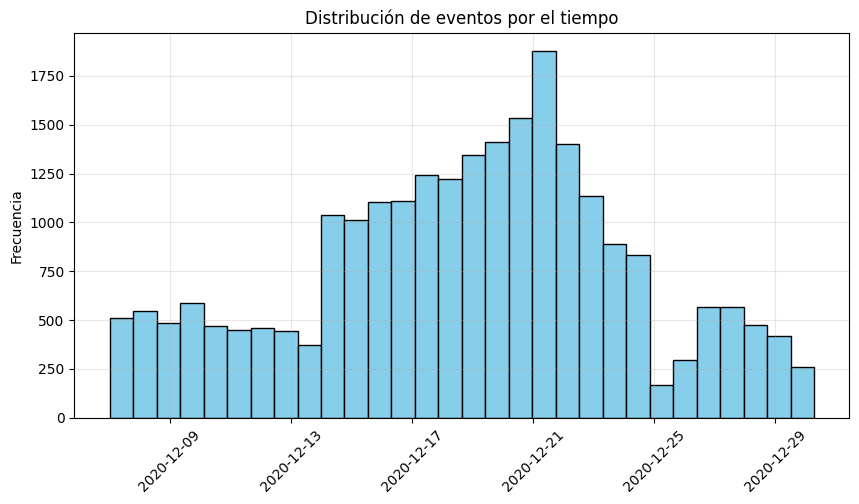

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(events_participants_clean['event_dt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de eventos por el tiempo')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

En el bloque de código anterior se generó un histograma que presenta la distribución de la cantidad de eventos que se registraron en los días en los que se recopilaron los datos de la prueba `recommender_system_test` donde se puede notar una actividad sin mucha fluctuación desde el día que se tiene registro (7 de diciembre) hasta el 13 de diciembre aproximadamente.

Después de la fecha del 13 de diciembre se nota un incremento en la cantidad de eventos registrados por día teniendo un pico cercano al día 21 de diciembre para después tener un descenso abruto hasta el día 25 de diciembre.

Posteriormente a la fecha del 25 de diciembre, vuelve a  haber un incremento en la cantidad de los eventos registrados en los días siguientes hasta el último día en que se terminó la recopilación de los datos de la prueba (1 de enero del 2021).

Se puede decir que el periodo de una actividad normal del 7 al 13 de diciembre es algo normal o esperado por parte de la pagina de compra de productos y el incremento que se dió en la cantidad de eventos registrados en los días posteriores puede deberse a la aproximación de la fecha festiva del 25 de diciembre por lo que este incremento en la actividad de los usuarios puede deberse a la compra de regalos navideños, que a medida que se acerca el día 21 se intensifican las compras y al acercarse la fecha se disminuye la actividad de los usuarios debido a que algunos quizá ya podían contar con envíos de sus compras a sus domicilios y la necesidad de comprar obsequios se vió disminuida.

A continuación se visualiza una descripción estadística de los eventos por día para visualizar estadísticas de interés como la media, mediana, valores máximo y mínimo, la desviaación est

In [ ]:
# eventos por dia
eventos_por_dia = events_participants_clean.groupby(events_participants_clean['event_dt'].dt.date)['event_name'].count().reset_index()

# estadísticas descriptivas
print("Estadísticas descriptivas de eventos por día:")
print(eventos_por_dia['event_name'].describe())

Estadísticas descriptivas de eventos por día:
count      23.000000
mean     1054.000000
std       590.341119
min         2.000000
25%       609.500000
50%       765.000000
75%      1490.000000
max      2469.000000
Name: event_name, dtype: float64


En el anterior bloque de código se calcularon estadísticas de interés que son reveladoras para ver el comportamiento de los usuarios dentro del periodo de tiempo en el que fueron estudiadas sus actividades dentro de la pagina de compra de productos.

- El promedio de eventos por día fue de 1054 con una desviación estándar de 590 eventos registrados.
- Hubo un día en el que se registraron 2 eventos como mínimo.
- Hubo un día en el que se registraron 2469 eventos como máximo.
- La mayoría de los días tuvieron una cantidad de eventos registrados dentro del rango de 609 y 1490 eventos.

A continuación se mostrarán los días que tuvieron la mínima y la máxima cantidad de eventos registrados.

In [ ]:
dia_con_menos_eventos = eventos_por_dia[eventos_por_dia['event_name'] <= 2]['event_dt'].iloc[0]
dia_con_mas_eventos = eventos_por_dia[eventos_por_dia['event_name'] >= 2469]['event_dt'].iloc[0]

print(f"Día con menor cantidad de eventos registrados: {dia_con_menos_eventos}")
print(f"Día con mayor cantidad de eventos registrados: {dia_con_mas_eventos}")

Día con menor cantidad de eventos registrados: 2020-12-30
Día con mayor cantidad de eventos registrados: 2020-12-21


En el anterior bloque de código se comprueba que el día con menor cantidad de eventos registrados es el día 30 de diciembre del 2020, cosa que es normal porque a finales de año puede que los usuarios tengan otras ocupaciones en el día y no solo checar la pagina de compra de productos y realizar alguna compra.

El día con mayor cantidad de eventos registrados es el día 21 de diciembre del 2020, respaldando la teoria de que los usuarios tienden a realizar más compras cercanas al 25 de diciembre para que esos productos se conviertan en regalos a sus allegados.

## Puntos a destacar antes de comenzar con la prueba A/B

En este tercer paso del proyecto que corresponde al análisis exploratorio de datos se realizaron diferentes investigaciones de posibiles peculiaridades que podrían contener los dataframes previamente analizados, algunas de estas peculiaridades fueron:

Del total de registros que se tenían en el dataframe `final_ab_events_upd_us`, se tenía un total de 58696 correspondientes a usuarios únicos, pero al filtrar el dataframe para solo los usuarios que pertenecían a la prueba `recommender_system_test` y que solo tuvieran un grupo asociado a ese usaurio, al final se contabilizó un total de 3234 usuarios únicos que participaron en la prueba de interés.

La distribución de usuarios en cada muestra de la prueba `recommender_system_test` es la siguiente:
    
    - Grupo A: 2422 usuarios
    - Grupo B: 812 usuarios
    
Lo que deja a las muestras de usuarios con una proporción de 74.89/25.11, en resumen una proporción       75/25. Una posibildad del porque se asignó esta proporción de usuarios a cada muestra es para minimizar riesgos como:

- Riesgo de sobreajuste (overfitting):

En el dado caso de que se emplee un modelo para realizar predicciones, con una proporción de 75% de los datos para entrenamiento se tienen suficientes datos para que el modelo pueda aprender y se reservan el 25% de los datos para verificar que el modelo pueda predecir eventos para casos nuevos.

- Riesgo de conclusiones prematuras por variabilidad aleatoria

Con muestras muy pequeñas, las diferencias observadas pueden ser solo ruido estadístico, pero con una proporción adecuada se asegura suficiente poder estadístico para detectar diferencias reales.

- Riesgo de ingresos/conversión

Si la prueba `recommedner_system_test` emplea un cambio drástico a comparación del grupo A, existe el riesgo de que disminuya la conversión. Al enviar solo el 25% del total de usaurios al grupo B, se limita el impacto negativo total en las ventas de la página de productos o  sobre las métricas clave.

- Mala experiencia de usuario (UX)

Si la nueva versión que experimentan el grupo B tiene errores o una usabilidad deficiente, solo una cuarta parte de los usuarios se ve afectada, lo que minimiza las quejas o la frustración de la base de clientes.

- Coste de oportunidad

Permite testear nuevas ideas sin arriesgar toda la cantidad de usaurios, manteniendo la estabilidad del la página con la versión del grupo A que es la de control.

- Riesgo de falsos positivos (Error Tipo I)

Con muestras pequeñas y múltiples comparaciones (como el caso de la conversión en los mútiples eventos: product_page → product_cart → purchase), aumenta la probabilidad de encontrar diferencias "significativas" que no son reales, y una proporción adecuada ayuda a mantener el nivel de significancia deseado.

- Riesgo de baja potencia estadística (Error Tipo II)

Con muestras muy pequeñas, podrían no ser detectadas las mejoras reales del 10% que se esperan en la prueba en cada etapa del embudo. El 75% de los usuarios dentro de la prueba brinda un mayor poder para detectar estas diferencias importantes y dado a que se busca verificar si hubo un cambio del 10%, no se requieren tantos usuarios para la muestra del grupo B por lo que el 25% de los usuarios serían suficientes para detectar este cambio pequeño.

A pesar de todos los riesgos potenciales que se pueden minimizar con una distribución 75/25 previniendo un impacto negativo, esta distribución sigue siendo menos eficiente que una distribución 50/50, además la distribución 75/25 requiere un mayor tamaño de muestra y más tiempo para lograr significancia estadística.

Otro punto a considerar es que se tenía previsto un total de 6000 participantes para esta prueba, pero solo se tienen 3234 usaurios participantes, así que debido a esto los resultados pueden diferir de lo esperado.

Con todas las consideraciones anteriores, ahora se procederá a evaluar los resultados de la prueba A/B para comprobar si existió el cambio del 10% esperado en cada etapa del embudo.

# Paso 4. Evaluación de resultados de la prueba A/B

En este apartado de evaluarán los resultados obtenidos de los grupos A y B de la prueba `recommender_system_test` para concluir si la introducción de un sistema de recomendaciones mejorado para una pagina de venta de productos tuvo una mejoría sobre la cantidad de eventos regsitrados donde se espera un aumento del 10% en la conversión de usuarios en los eventos `product_page`, `product_cart` y `purchase`.

Para analizar los eventos registrados para cada usuario dependiendo del grupo, se creará una tabla dinámica para tener un desglose de los eventos a partir de los usuarios regsitrados para cada grupo.

In [ ]:
# tabla dinámica de usuarios únicos por Grupo y Evento
tabla_dinamica = events_participants_clean.pivot_table(index="event_name", columns="group", values="user_id", aggfunc="nunique").reset_index()

# reordenar la tabla dinámica según el orden del embudo
tabla_dinamica_ordenada = tabla_dinamica.set_index('event_name').reindex(orden_del_embudo).reset_index()

print(tabla_dinamica_ordenada)

group    event_name     A    B
0             login  2422  811
1      product_page  1571  461
2      product_cart   728  225
3          purchase   773  228


Con esta tabla dinámica se puede observar la cantidad de usuarios que pasaron al siguiente evento a partir de la cantidad  inicial de usuarios en ese grupo.

A continuación, se generará una función que calculará la diferencia estadística entre los grupos a partir de un z-test de proporciones donde posteriormente se comprobarán estas diferencias para los eventos `product_page`, `product_cart` y `purchase` para verificar si efectivamente se percibió un aumento del 10% en los registros como se tenía esperado.

In [ ]:
# --- FUNCIÓN PARA EL TEST DE HIPÓTESIS ---

def check_hypothesis(group1, group2, event, alpha=0.05):

  # Obteniendo datos exitosos
  usuarios_convertidos1 = tabla_dinamica_ordenada[tabla_dinamica_ordenada["event_name"] == event][group1].iloc[0]
  usuarios_convertidos2 = tabla_dinamica_ordenada[tabla_dinamica_ordenada["event_name"] == event][group2].iloc[0]

  # Total de usuarios por grupo
  total_usaurios1 = usuarios_por_grupo_clean[group1]
  total_usaurios2 = usuarios_por_grupo_clean[group2]

  # Aplicar el z-test
  stats, p_value = proportions_ztest([usuarios_convertidos1, usuarios_convertidos2], [total_usaurios1, total_usaurios2])

  print(f"---- {event} ----")
  print(f"Grupos {group1} vs {group2}")
  print(f"p-value: {p_value:.4f}")

  if p_value < alpha:
    print("❌Rechazamos H0: Hay diferencia significativa")
  else:
    print("✅No rechazamos H0: No hay diferencia significativa (Son similares)")
  print('-'*50)

In [ ]:
check_hypothesis('A','B', 'product_page', alpha=0.05)
check_hypothesis('A','B', 'product_cart', alpha=0.05)
check_hypothesis('A','B', 'purchase', alpha=0.05)

---- product_page ----
Grupos A vs B
p-value: 0.0000
❌Rechazamos H0: Hay diferencia significativa
--------------------------------------------------
---- product_cart ----
Grupos A vs B
p-value: 0.2040
✅No rechazamos H0: No hay diferencia significativa (Son similares)
--------------------------------------------------
---- purchase ----
Grupos A vs B
p-value: 0.0407
❌Rechazamos H0: Hay diferencia significativa
--------------------------------------------------


En el bloque de código anterior se tienen los resultados de las pruebas estadísticas de proporción para los eventos `product_page`, `product_cart` y `purchase` de los grupos A y B de la prueba `recommender_system_test` teniendo como resultado que:

- Con un umbral de significancia estadística del 5%, para el evento `product_page` si hay una diferencia estadística lo bastante significativa para decir que el tamaño de los grupos es diferente.

- Con el mismo umbral de significancia estadística, para el evento `prodcut_cart` no se tiene una diferencia estadística lo significativa por lo que el tamaño de los grupos son similares (esto vuelve a respaldar la teoría de que los usuarios realizan compras de productos directamente despúes de haber visto la pagina principal ignorando la pagina que muestra el carrito de su perfil)

- Nuevamente con el mismo umbral de significancia estadística, para el evento `purchase` se tiene una diferencia estadística significativa para decir que el tamaño de los grupos para este evento es diferente.

Dadas las conclusiones anteriores, se realizará código para calcular la conversión total de usuarios en cada evento a partir de la cantiad inicial de usuarios de la prueba que se observan en la tabla dinámica anteriormente mostrada, esto con el fin de ver si las diferencias observadas en los grupos se acercan al porcentaje esperado que resultaría de introducir el sistema de recomendaciones mejorado que es de un 10% mayor el del grupo B a comparación del grupo A.

In [ ]:
# cantidad inicial de usuarios
usuarios_totales_rst_A = tabla_dinamica_ordenada.iloc[0]['A']
usuarios_totales_rst_B = tabla_dinamica_ordenada.iloc[0]['B']

# creación de la columna 'Conversion total (%)'
tabla_dinamica_ordenada['Conversion total grupo A (%)'] = (tabla_dinamica_ordenada['A'] / usuarios_totales_rst_A * 100).round(2)
tabla_dinamica_ordenada['Conversion total grupo B (%)'] = (tabla_dinamica_ordenada['B'] / usuarios_totales_rst_B * 100).round(2)

print(tabla_dinamica_ordenada)

group    event_name     A    B  Conversion total grupo A (%)  \
0             login  2422  811                        100.00   
1      product_page  1571  461                         64.86   
2      product_cart   728  225                         30.06   
3          purchase   773  228                         31.92   

group  Conversion total grupo B (%)  
0                            100.00  
1                             56.84  
2                             27.74  
3                             28.11  


Los resultados que se obtuvieron en el anterior bloque de código se muestra que las conversiones de los usuarios de los grupos A y B para los eventos `product_cart` y `purchase` tuvieron los siguientes porcentajes:

- Evento: `product_page`

El grupo A tuvo una tasa de conversión del 64.86% y el grupo B tuvo una tasa de conversión del 56.84%, es decir que si hay una diferencia entre la tasa de conversión de los grupos para este evento pero es negativa, hubo una reducción del 8.02%.

- Evento `product_cart`
 
El grupo A tuvo una tasa de conversión del 30.06% y el grupo B tuvo una tasa de conversión del 27.74%, una diferencia de 2.32%, por lo que los resultados de la prueba de proporciones son acertados al decir que no hay una gran diferencia entre estos grupos, pero esta mínima diferencia sigue siendo negativa.

- Evento `purchase`

El grupo A tuvo una tasa de conversión del 31.92% y el grupo B tuvo una tasa de conversión del 28.11%, una diferencia del 3.81% que para los resultados de la prueba de proporciones se considera una diferencia lo bastante significativa, pero sigue siendo negativa.

Los resultados sugieren que la implementación de este nuevo sistema de recomendaciones mejorado no tuvo el efecto esperado en el grupo de prueba y al contrario de ser positivo, su impacto se vió reflejado en una disminución en las tasas de conversión de los usuarios en los eventos `product_page`, `product_cart` y `purchase`.

# Conclusiones 

Finalmente, como conclusiones finales se tiene que:

- Principalmente, la implementación del nuevo sistema de recomendaciones al que se sometió a prueba el grupo B, arrojó resultados negativos a lo esperado, resultando en una reducción en la tasa de conversión de los usuarios en cada evento del embudo de la página de venta de productos.

- La distribución del tamaño de las muestras de los grupos de control y de prueba (75/25) a pesar de querer disminuir el impacto negativo que la prueba pudiera generar, una prueba con una distribución del 50/50 arrojaría resultados más verídicos debido a la naturalidad de la prueba, por lo que una causa de este impacto negativo sea por el tamaño de los grupos que fueron utilizados para la prueba `recommender_system_test`.

- Para obtener resultados con menor riesgo de que presenten lecturas erróneas a partir de los datos, se recomienda que el periodo en el que los usuarios sean sometidos a la prueba sea mayor a un mes, con el fin de recopilar información suficiente del comportamiento de los usuarios y poder generar resultados más verdaderos que los que se pudieron obtener en 26 dias como lo fue el caso de esta prueba (7 de diciembre dle 2020 al 1 de enero del 2021).